In [1]:
# Đọc dữ liệu từ file data.txt
import os

input_file = "data.txt"
if not os.path.exists(input_file):
    print(f"File {input_file} không tồn tại.")
    exit()
    
with open(input_file, "r", encoding="utf-8") as file:
    content = file.read()

In [2]:
# Hàm xử lý và chia cột dữ liệu
def extract_chapters_and_rules(content):
    chapters = []
    current_chapter = None

    lines = content.splitlines()
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line.startswith("Chương"):
            current_chapter = line
        elif line.startswith("Điều") and current_chapter:
            rule_number = line
            context = ""
            i += 1
            while i < len(lines):
                next_line = lines[i].strip()
                if next_line.startswith("Điều") or next_line.startswith("Chương"):
                    i -= 1
                    break
                context += next_line + " "
                i += 1
            chapters.append({"Chapter": current_chapter, "Article": rule_number, "Context": context.strip()})
        i += 1
    return chapters

data = extract_chapters_and_rules(content)

In [3]:
# Tạo DataFrame và thực hiện EDA
import pandas as pd
df = pd.DataFrame(data)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df.head(10)

,Chapter,Article,Context
0,Chương I,Điều 1. Phạm vi điều chỉnh,"Luật này quy định về việc thành lập, tổ chức q..."
1,Chương I,Điều 2. Đối tượng áp dụng,"1. Doanh nghiệp. 2. Cơ quan, tổ chức, cá nhân..."
2,Chương I,Điều 3. Áp dụng Luật Doanh nghiệp và luật khác,Trường hợp luật khác có quy định đặc thù về vi...
3,Chương I,Điều 4. Giải thích từ ngữ,"Trong Luật này, các từ ngữ dưới đây được hiểu ..."
4,Chương I,Điều 5. Bảo đảm của Nhà nước đối với doanh ngh...,1. Nhà nước công nhận sự tồn tại lâu dài và ph...
5,Chương I,"Điều 6. Tổ chức chính trị, tổ chức chính trị -...","1. Tổ chức chính trị, tổ chức chính trị - xã h..."
6,Chương I,Điều 7. Quyền của doanh nghiệp,"1. Tự do kinh doanh ngành, nghề mà luật không ..."
7,Chương I,Điều 8. Nghĩa vụ của doanh nghiệp,1. Đáp ứng đủ điều kiện đầu tư kinh doanh khi ...
8,Chương I,Điều 9. Quyền và nghĩa vụ của doanh nghiệp cun...,1. Quyền và nghĩa vụ của doanh nghiệp quy định...
9,Chương I,"Điều 10. Tiêu chí, quyền và nghĩa vụ của doanh...",1. Doanh nghiệp xã hội phải đáp ứng các tiêu c...


In [ ]:
df.tail(10)

,Chapter,Article,Context
208,Chương IX,Điều 209. Giải thể doanh nghiệp trong trường h...,Việc giải thể doanh nghiệp trong trường hợp bị...
209,Chương IX,Điều 210. Hồ sơ giải thể doanh nghiệp,1. Hồ sơ giải thể doanh nghiệp bao gồm giấy tờ...
210,Chương IX,Điều 211. Các hoạt động bị cấm kể từ khi có qu...,1. Kể từ khi có quyết định giải thể doanh nghi...
211,Chương IX,Điều 212. Thu hồi Giấy chứng nhận đăng ký doan...,1. Doanh nghiệp bị thu hồi Giấy chứng nhận đăn...
212,Chương IX,"Điều 213. Chấm dứt hoạt động chi nhánh, văn ph...","1. Chi nhánh, văn phòng đại diện, địa điểm kin..."
213,Chương IX,Điều 214. Phá sản doanh nghiệp,Việc phá sản doanh nghiệp được thực hiện theo ...
214,Chương X,Điều 215. Trách nhiệm các cơ quan quản lý nhà ...,1. Chính phủ thống nhất quản lý nhà nước đối v...
215,Chương X,Điều 216. Cơ quan đăng ký kinh doanh,"1. Cơ quan đăng ký kinh doanh có nhiệm vụ, quy..."
216,Chương X,Điều 217. Điều khoản thi hành,1. Luật này có hiệu lực thi hành từ ngày 01 th...
217,Chương X,Điều 218. Quy định chuyển tiếp,1. Các công ty không có cổ phần hoặc phần vốn ...


In [ ]:
print(df)

       Chapter                                            Article  \
0     Chương I                         Điều 1. Phạm vi điều chỉnh   
1     Chương I                          Điều 2. Đối tượng áp dụng   
2     Chương I     Điều 3. Áp dụng Luật Doanh nghiệp và luật khác   
3     Chương I                          Điều 4. Giải thích từ ngữ   
4     Chương I  Điều 5. Bảo đảm của Nhà nước đối với doanh ngh...   
..         ...                                                ...   
213  Chương IX                     Điều 214. Phá sản doanh nghiệp   
214   Chương X  Điều 215. Trách nhiệm các cơ quan quản lý nhà ...   
215   Chương X               Điều 216. Cơ quan đăng ký kinh doanh   
216   Chương X                      Điều 217. Điều khoản thi hành   
217   Chương X                     Điều 218. Quy định chuyển tiếp   

                                               Context  
0    Luật này quy định về việc thành lập, tổ chức q...  
1    1. Doanh nghiệp.  2. Cơ quan, tổ chức, cá nhân...  


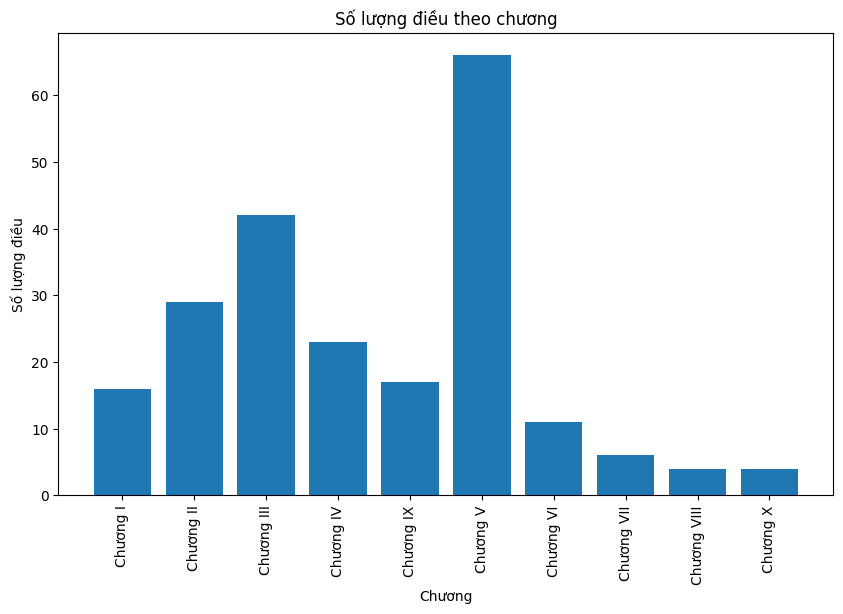

In [ ]:
import matplotlib as plt 
import matplotlib.pyplot as plt
chapter_counts = df.groupby("Chapter")["Article"].count().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(chapter_counts["Chapter"], chapter_counts["Article"])
plt.xticks(rotation=90)
plt.xlabel("Chương")
plt.ylabel("Số lượng điều")
plt.title("Số lượng điều theo chương")
plt.show()

In [ ]:
# Kiểm tra dữ liệu bị thiếu
print("Số lượng giá trị bị thiếu trong mỗi cột:")
print(df.isnull().sum())

Số lượng giá trị bị thiếu trong mỗi cột:
Chapter    0
Article    0
Context    0
dtype: int64


<bound method NDFrame.describe of                                                Article  \
0                           Điều 1. Phạm vi điều chỉnh   
1                            Điều 2. Đối tượng áp dụng   
2       Điều 3. Áp dụng Luật Doanh nghiệp và luật khác   
3                            Điều 4. Giải thích từ ngữ   
4    Điều 5. Bảo đảm của Nhà nước đối với doanh ngh...   
..                                                 ...   
213                     Điều 214. Phá sản doanh nghiệp   
214  Điều 215. Trách nhiệm các cơ quan quản lý nhà ...   
215               Điều 216. Cơ quan đăng ký kinh doanh   
216                      Điều 217. Điều khoản thi hành   
217                     Điều 218. Quy định chuyển tiếp   

                                               Context  Chapter_Chương I  \
0    Luật này quy định về việc thành lập, tổ chức q...              True   
1    1. Doanh nghiệp.  2. Cơ quan, tổ chức, cá nhân...              True   
2    Trường hợp luật khác có quy định đặc

In [ ]:
# Cell 4: Lưu dữ liệu vào file CSV
#import csv

#output_file = "radata.csv"

#def save_csv(data, filename):
    #with open(filename, 'w', encoding='utf-8', newline='') as f:
        #writer = csv.DictWriter(f, fieldnames=["Chapter", "Article", "Context"])
        #writer.writeheader()
        #writer.writerows(data)

#save_csv(data, output_file)
#print(f"Đã lưu dữ liệu vào {output_file}")